# <font color=#025dfa> Three generations seeking romance - Regression & Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.set_option("display.max_columns",35)

In [3]:
df=pd.read_csv('profiles.csv')

## <font color=#d707f2> EDA Exploratory Data Analsis

In [4]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [5]:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
12911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(60552, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [9]:
60552*20/100

12110.4

In [10]:
df.describe()

,age,height,income
count,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155
std,9.445488,3.905229,91428.807808
min,18.000000,36.000000,-1.000000
25%,25.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,36.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [11]:
df.isnull().sum().sort_values(ascending=True)

age            51038
sex            51038
orientation    51038
location       51038
last_online    51038
income         51038
height         51038
status         51038
speaks         51044
drinks         51540
essay0         51885
body_type      51886
smokes         51956
ethnicity      51987
education      52093
essay1         52205
job            52369
essay2         52503
essay4         52673
essay5         52738
sign           52776
essay3         52862
essay9         52998
essay7         52999
essay6         53200
drugs          53337
essay8         54191
pets           54200
religion       54291
diet           54791
offspring      56666
dtype: int64

In [12]:
df.corr(numeric_only=True)

,age,height,income
age,1.000000,-0.022078,0.011424
height,-0.022078,1.000000,0.073105
income,0.011424,0.073105,1.000000


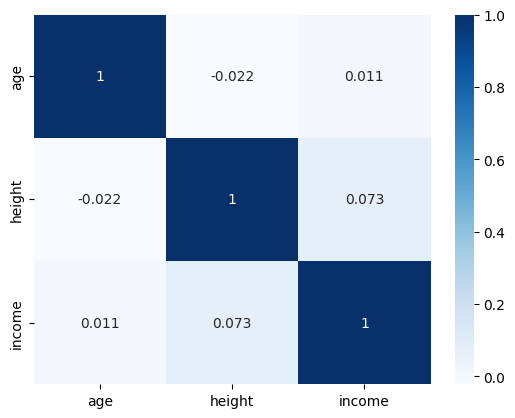

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [14]:
#abs(df.corr(numeric_only=True)['status']).sort_values(ascending=False)

### <font color=#9e32a8> Gereksiz Verileri Silme İşlemi Yapıyoruz

In [15]:
df.head(1)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


In [16]:
df=df.dropna(how='all',axis=0) 
#dropna=içinde NaN olan veriler,how='all' =  hepsi
df=df.drop(['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7','essay8', 'essay9'],axis=1)
df.head(1)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


### <font color='#0975e8'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzetmaye Başladık

In [17]:
df.isnull().sum().sort_values(ascending=False)

offspring      5628
diet           3753
religion       3253
pets           3162
drugs          2299
sign           1738
job            1331
education      1055
ethnicity       949
smokes          918
body_type       848
drinks          502
speaks            6
age               0
sex               0
last_online       0
orientation       0
location          0
income            0
height            0
status            0
dtype: int64

#### <font color=#2da6f7> Tüm Satırdaki Cümlelerin Gereksiz Kısmını Sildik

In [18]:
def algo_text(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.lower()
            df[col] = df[col].str.replace('[^\w\s]', '', regex=True)
            df[col] = df[col].str.replace('\n', '')
            df[col] = df[col].str.replace('\d', '')
            df[col] = df[col].str.replace('\r', '')
            df[col] = df[col].str.replace('.', '')
            df[col] = df[col].str.replace(',', '')
    return df

df=algo_text(df)
df.head(1)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on collegeuniversity,asian white,75.0,-1.0,transportation,201206282030,south san francisco california,doesnrsquot have kids but might want them,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


#### <font color=#2da6f7> last_online Ayırıyoruz

In [19]:
df['last_online']=pd.to_datetime(df['last_online'])
df['year']=(df['last_online']).dt.year
df['month']=(df['last_online']).dt.month
df['day']=(df['last_online']).dt.day
df['hour']=(df['last_online']).dt.hour
df['minute']=(df['last_online']).dt.minute
df=df.drop('last_online',axis=1) 
df.head(1)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,year,month,day,hour,minute
0,22.0,a little extra,strictly anything,socially,never,working on collegeuniversity,asian white,75.0,-1.0,transportation,south san francisco california,doesnrsquot have kids but might want them,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,2012,6,28,20,30


In [20]:
df[['age', 'height', 'income']]=df[['age', 'height', 'income']].astype(int)

#### <font color=#2da6f7> offspring ile İlgileniyoruz

In [21]:
df['offspring'].unique()

array(['doesnrsquot have kids but might want them', nan,
       'doesnrsquot want kids', 'doesnrsquot have kids but wants them',
       'doesnrsquot have kids', 'wants kids', 'has a kid', 'has kids',
       'doesnrsquot have kids and doesnrsquot want any',
       'has kids but doesnrsquot want more',
       'has a kid but doesnrsquot want more', 'has a kid and wants more',
       'has kids and might want more', 'might want kids',
       'has a kid and might want more', 'has kids and wants more'],
      dtype=object)

In [22]:
df['kid']=df['offspring'].replace({
                                   'doesnrsquot have kids but might want them':0,
                                   'doesnrsquot want kids':0,
                                   'doesnrsquot have kids but wants them':0,
                                   'doesnrsquot have kids':0,
                                   'doesnrsquot have kids and doesnrsquot want any':0,
                                   'might want kids':0,
                                   'wants kids':0,
    
                                   'has a kid':1,
                                   'has kids':1,
                                   'has kids but doesnrsquot want more':1,
                                   'has a kid but doesnrsquot want more':1,
                                   'has a kid and wants more':1,
                                   'has kids and might want more':1,
                                   'has a kid and might want more':1,
                                   'has kids and wants more':1
})
df=df.drop('offspring',axis=1)
values = df['kid'].dropna().tolist()
df['kid'] = df['kid'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['kid'].unique()

array([0., 1.])

#### <font color=#2da6f7> diet ile İlgileniyoruz

In [23]:
df['diet'].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

In [24]:
df['diet']=df['diet'].replace({'strictly anything':'anything', 
                               'mostly anything':'anything',
                               
                               'strictly vegan':'vegan',
                               'mostly vegan':'vegan',
                               
                               'mostly vegetarian':'vegetarian',
                               'strictly vegetarian':'vegetarian',                                
                               
                               'mostly halal':'halal',
                               'strictly halal':'halal',
                               
                               'strictly other':'other',
                               'mostly other':'other',
                               
                               'strictly kosher':'kosher',
                               'mostly kosher':'kosher',
})
values = df['diet'].dropna().tolist()#nan verilerini kaldırır ve verimizi pythone listesine çevirir
df['diet'] = df['diet'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
#np.random.choice(values): values listesinden rastgele bir eleman seçer. Bu, eksik değerleri doldurmak için kullanılır.
#if pd.isna(x): x değerinin NaN (eksik) olup olmadığını kontrol eder.
#else x: Eğer x NaN değilse, mevcut değeri olduğu gibi döner.
df['diet'].unique()

array(['anything', 'other', 'vegetarian', 'vegan', 'halal', 'kosher'],
      dtype=object)

#### <font color=#2da6f7> religion ile İlgileniyoruz

In [25]:
df['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [26]:
df['religion']=df['religion'].replace({
                               'agnosticism and very serious about it':'agnosticism',
                               'agnosticism but not too serious about it':'agnosticism',
                               'agnosticism and laughing about it':'agnosticism',
                               'agnosticism and somewhat serious about it':'agnosticism',
                               
                               'christianity but not too serious about it':'christianity',
                               'christianity and very serious about it':'christianity',
                               'christianity and somewhat serious about it':'christianity',
                               'christianity and laughing about it':'christianity',

                               'atheism and laughing about it':'atheism',
                               'atheism and somewhat serious about it':'atheism',
                               'atheism but not too serious about it':'atheism',
                               'atheism and very serious about it':'atheism',

                               'other but not too serious about it':'other',
                               'other and laughing about it':'other',
                               'other and somewhat serious about it':'other',
                               'other and very serious about it':'other',
                               
                               'catholicism but not too serious about it':'catholicism',
                               'catholicism and somewhat serious about it':'catholicism', 
                               'catholicism and laughing about it':'catholicism',
                               'catholicism and very serious about it':'catholicism',
                               
                               'buddhism but not too serious about it':'buddhism',
                               'buddhism and laughing about it':'buddhism',
                               'buddhism and very serious about it':'buddhism',
                               'buddhism and somewhat serious about it':'buddhism',
                               
                               
                               'judaism but not too serious about it':'judaism',
                               'judaism and laughing about it':'judaism',
                               'judaism and somewhat serious about it':'judaism',
                               'judaism and very serious about it':'judaism',
                               
                               'hinduism but not too serious about it':'hinduism',
                               'hinduism and very serious about it':'hinduism',
                               'hinduism and somewhat serious about it':'hinduism',
                               'hinduism and laughing about it':'hinduism',
                               
                               'islam and very serious about it':'islam',
                               'islam but not too serious about it':'islam',
                               'islam and laughing about it':'islam',
                               'islam and somewhat serious about it':'islam'

})
values = df['religion'].dropna().tolist()
df['religion'] = df['religion'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['religion'].unique()

array(['agnosticism', 'atheism', 'judaism', 'christianity', 'catholicism',
       'other', 'buddhism', 'hinduism', 'islam'], dtype=object)

#### <font color=#2da6f7> pets ile İlgileniyoruz

In [27]:
df['pets'].unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats', nan,
       'has dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has dogs',
       'has dogs and dislikes cats', 'likes dogs',
       'has dogs and has cats', 'dislikes dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

In [28]:
df['pets']=df['pets'].replace({"likes dogs and likes cats": "cat and dog lover",
                               "has dogs and likes cats": "cat and dog lover",
                               "likes dogs and has cats": "cat and dog lover",
                               "has dogs and has cats": "cat and dog lover",
                               
                               "has cats": "cat lover",
                               "likes cats": "cat lover",
                               "dislikes dogs and has cats": "cat lover",
                               "dislikes dogs and likes cats": "cat lover",
                               
                               "likes dogs and dislikes cats": "dog lover",
                               "has dogs": "dog lover",
                               "has dogs and dislikes cats": "dog lover",
                               "likes dogs": "dog lover",
                               
                               "dislikes dogs and dislikes cats": "Dislikes both dogs and cats",
                               "dislikes cats": "Dislikes cats",
                               "dislikes dogs": "Dislikes dogs"
})
values = df['pets'].dropna().tolist()
df['pets'] = df['pets'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['pets'].unique()

array(['cat and dog lover', 'cat lover', 'dog lover',
       'Dislikes both dogs and cats', 'Dislikes cats', 'Dislikes dogs'],
      dtype=object)

#### <font color=#2da6f7> drugs ile İlgileniyoruz

In [29]:
df['drugs'].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [30]:
values = df['drugs'].dropna().tolist()
df['drugs'] = df['drugs'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['drugs'].unique()

array(['never', 'sometimes', 'often'], dtype=object)

#### <font color=#2da6f7> sign ile İlgileniyoruz

In [31]:
df['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesnrsquot matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesnrsquot matter',
       'cancer but it doesnrsquot matter',
       'leo but it doesnrsquot matter', nan,
       'aquarius but it doesnrsquot matter',
       'aries and itrsquos fun to think about',
       'libra but it doesnrsquot matter',
       'pisces and itrsquos fun to think about', 'libra',
       'taurus but it doesnrsquot matter',
       'sagittarius but it doesnrsquot matter',
       'scorpio and it matters a lot',
       'gemini and itrsquos fun to think about',
       'leo and itrsquos fun to think about',
       'cancer and itrsquos fun to think about',
       'libra and itrsquos fun to think about',
       'aquarius and itrsquos fun to think about',
       'virgo but it doesnrsquot matter',
       'scorpio and itrsquos fun to think about',
       'capricorn but it doesnrsquot matter', 'scorpio',
       'capricorn and itrsqu

In [32]:
df['sign']=df['sign'].replace({
    
    'aries and itrsquos fun to think about':'aries',
    'aries but it doesnrsquot matter':'aries', 
    'aries and it matters a lot':'aries',
    'aquarius but it doesnrsquot matter':'aquarius',
    'aquarius and itrsquos fun to think about':'aquarius',
    'aquarius and it matters a lot':'aquarius',
    'cancer but it doesnrsquot matter':'cancer',
    'cancer and itrsquos fun to think about':'cancer',
    'cancer and it matters a lot':'cancer',
    'gemini but it doesnrsquot matter':'gemini',
    'gemini and itrsquos fun to think about':'gemini',
    'gemini and it matters a lot':'gemini',

    'pisces but it doesnrsquot matter':'pisces',
    'pisces and itrsquos fun to think about':'pisces',
    'pisces and it matters a lot':'pisces',
    
    'taurus but it doesnrsquot matter':'taurus',
    'taurus and itrsquos fun to think about':'taurus',
    'taurus and it matters a lot':'taurus',
    
    'virgo but it doesnrsquot matter':'virgo',
    'virgo and itrsquos fun to think about':'virgo',
    'virgo and it matters a lot':'virgo',
  
    'sagittarius but it doesnrsquot matter':'sagittarius',
    'sagittarius and itrsquos fun to think about':'sagittarius',
    'sagittarius and it matters a lot':'sagittarius',

    'leo but it doesnrsquot matter':'leo',
    'leo and itrsquos fun to think about':'leo',
    'leo and it matters a lot':'leo',
 
    'libra but it doesnrsquot matter':'libra',
    'libra and itrsquos fun to think about':'libra',
    'libra and it matters a lot':'libra',

    'scorpio and it matters a lot':'scorpio',
    'scorpio and itrsquos fun to think about':'scorpio',
    'scorpio but it doesnrsquot matter':'scorpio',

    'capricorn but it doesnrsquot matter':'capricorn',
    'capricorn and itrsquos fun to think about':'capricorn',
    'capricorn and it matters a lot':'capricorn'
})
values = df['sign'].dropna().tolist()
df['sign'] = df['sign'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['sign'].unique()

array(['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo',
       'sagittarius', 'leo', 'aries', 'libra', 'scorpio', 'capricorn'],
      dtype=object)

#### <font color=#2da6f7> education ile İlgileniyoruz

In [33]:
df['education'].unique()

array(['working on collegeuniversity', 'working on space camp',
       'graduated from masters program',
       'graduated from collegeuniversity', 'working on twoyear college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'collegeuniversity',
       'dropped out of space camp', 'graduated from phd program',
       'graduated from law school', 'working on phd program',
       'twoyear college', 'graduated from twoyear college',
       'working on med school', 'dropped out of collegeuniversity',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of phd program',
       'dropped out of twoyear college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'phd program',
       'dropped out of law school'], dtype=object)

In [34]:
df['education']=df['education'].replace({
    'working on collegeuniversity': 'Working on Education',
    'working on space camp': 'Working on Education',
    'working on twoyear college': 'Working on Education',
    'working on masters program': 'Working on Education',
    'working on phd program': 'Working on Education',
    'working on med school': 'Working on Education',
    'working on high school': 'Working on Education',
    'working on law school': 'Working on Education',
    
    'graduated from masters program': 'Graduated',
    'graduated from collegeuniversity': 'Graduated',
    'graduated from high school': 'Graduated',
    'graduated from space camp': 'Graduated',
    'collegeuniversity': 'Graduated',
    'graduated from phd program': 'Graduated',
    'graduated from law school': 'Graduated',
    'twoyear college': 'Graduated',
    'graduated from twoyear college': 'Graduated',
    'space camp': 'Graduated',
    'graduated from med school': 'Graduated',
    'masters program': 'Graduated',
    'high school': 'Graduated',
    'phd program': 'Graduated',
    'law school': 'Graduated',
    
    'dropped out of space camp': 'Dropped out of Education',
    'dropped out of collegeuniversity': 'Dropped out of Education',
    'dropped out of high school': 'Dropped out of Education',
    'dropped out of phd program': 'Dropped out of Education',
    'dropped out of twoyear college': 'Dropped out of Education',
    'dropped out of med school': 'Dropped out of Education',
    'dropped out of masters program': 'Dropped out of Education',
    'dropped out of law school': 'Dropped out of Education'
})
values = df['education'].dropna().tolist()
df['education'] = df['education'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['education'].unique()

array(['Working on Education', 'Graduated', 'Dropped out of Education'],
      dtype=object)

#### <font color=#2da6f7> smokes ile İlgileniyoruz

In [35]:
df['smokes'].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [36]:
values = df['smokes'].dropna().tolist()
df['smokes'] = df['smokes'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['smokes'].unique()

array(['sometimes', 'no', 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

#### <font color=#2da6f7> body_type ile İlgileniyoruz

In [37]:
df['body_type'].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [38]:
df['body_type']=df['body_type'].replace({
    'athletic':"fit",
    'jacked':"fit",
    
    'skinny':"thin",
                                           
    'full figured':"curvy",
                                           
    'rather not say':"other", 
    'used up':"other",
                                           
    'a little extra':"extra", 
    'overweight':"extra"
})
values = df['body_type'].dropna().tolist()
df['body_type'] = df['body_type'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['body_type'].unique()

array(['extra', 'average', 'thin', 'fit', 'other', 'curvy'], dtype=object)

#### <font color=#2da6f7> drinks ile İlgileniyoruz

In [39]:
df['drinks'].unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In [40]:
values = df['drinks'].dropna().tolist()
df['drinks'] = df['drinks'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['drinks'].unique()

array(['socially', 'often', 'not at all', 'rarely', 'very often',
       'desperately'], dtype=object)

#### <font color=#2da6f7> speaks ile İlgileniyoruz

In [41]:
df['speaks'].unique()

array(['english', 'english fluently spanish poorly french poorly',
       'english french c', ...,
       'english fluently french okay spanish poorly sign language poorly',
       'english fluently spanish swedish',
       'english fluently french okay swedish poorly'], dtype=object)

In [42]:
values = df['speaks'].dropna().tolist()
df['speaks'] = df['speaks'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['speaks'].unique()

array(['english', 'english fluently spanish poorly french poorly',
       'english french c', ...,
       'english fluently french okay spanish poorly sign language poorly',
       'english fluently spanish swedish',
       'english fluently french okay swedish poorly'], dtype=object)

#### <font color=#2da6f7> orientation ile İlgileniyoruz

In [43]:
df['orientation'].unique()

array(['straight', 'bisexual', 'gay'], dtype=object)

In [44]:
df['orientation'] = df['orientation'].replace({
    'lesbian': 'lesbian',
    'bi': 'bisexual',
    'bi curious': 'bisexual',
    'straight': 'straight',
    'gay': 'gay'
})
values = df['orientation'].dropna().tolist()
df['orientation'] = df['orientation'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['orientation'].unique()

array(['straight', 'bisexual', 'gay'], dtype=object)

#### <font color=#2da6f7> income ile İlgileniyoruz

In [45]:
df['income'].unique()

array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000])

In [46]:
df['income']=df['income'].replace(['-1.0e+00'],['0'])
df['income']=df['income'].replace(['8.0e+04'],['80000'])
df['income']=df['income'].replace(['2.0e+04'],['20000'])
df['income']=df['income'].replace(['4.0e+04'],['40000'])
df['income']=df['income'].replace(['3.0e+04'],['30000'])
df['income']=df['income'].replace(['5.0e+04'],['50000'])
df['income']=df['income'].replace(['6.0e+04'],['60000'])
df['income']=df['income'].replace(['1.0e+06'],['1000000'])
df['income']=df['income'].replace(['1.5e+05'],['150000'])
df['income']=df['income'].replace(['1.0e+05'],['100000'])
df['income']=df['income'].replace(['5.0e+05'],['500000'])
df['income']=df['income'].replace(['7.0e+04'],['70000'])
df['income']=df['income'].replace(['2.5e+05'],['250000'])

#### <font color=#2da6f7> job ile İlgileniyoruz

In [47]:
df['job'].unique()

array(['transportation', 'hospitality  travel', nan, 'student',
       'artistic  musical  writer', 'computer  hardware  software',
       'banking  financial  real estate', 'entertainment  media',
       'sales  marketing  biz dev', 'other', 'medicine  health',
       'science  tech  engineering', 'executive  management',
       'education  academia', 'clerical  administrative',
       'construction  craftsmanship', 'rather not say',
       'political  government', 'law  legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [48]:
values = df['job'].dropna().tolist()
df['job'] = df['job'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['job'].unique()

array(['transportation', 'hospitality  travel', 'other', 'student',
       'artistic  musical  writer', 'computer  hardware  software',
       'banking  financial  real estate', 'entertainment  media',
       'sales  marketing  biz dev', 'medicine  health',
       'science  tech  engineering', 'executive  management',
       'education  academia', 'clerical  administrative',
       'construction  craftsmanship', 'rather not say',
       'political  government', 'law  legal services', 'unemployed',
       'military', 'retired'], dtype=object)

#### <font color=#2da6f7> ethnicity ile İlgileniyoruz

In [49]:
df['ethnicity'].unique()

array(['asian white', 'white', nan, 'asian black other', 'white other',
       'hispanic  latin white', 'hispanic  latin',
       'pacific islander white', 'asian', 'black white',
       'pacific islander', 'asian native american',
       'asian pacific islander', 'black native american white',
       'middle eastern other', 'native american white', 'indian', 'black',
       'black native american hispanic  latin other',
       'black native american hispanic  latin',
       'asian black pacific islander',
       'asian middle eastern black native american indian pacific islander hispanic  latin white other',
       'other', 'hispanic  latin other', 'asian black',
       'middle eastern white', 'native american white other',
       'black native american', 'black white other',
       'hispanic  latin white other', 'middle eastern', 'black other',
       'native american hispanic  latin white', 'black indian',
       'indian white other', 'middle eastern indian other',
       'black nat

In [50]:
ethnicity_groups = {
    'asian': 'Asian',
    'asian black other': 'Asian',
    'asian black pacific islander': 'Asian',
    'asian black white': 'Asian',
    'asian black native american pacific islander white': 'Asian',
    'asian pacific islander': 'Asian',
    'asian native american': 'Asian',
    'asian middle eastern': 'Asian',
    'asian middle eastern black': 'Asian',
    'asian middle eastern indian': 'Asian',
    'asian middle eastern white': 'Asian',
    'asian pacific islander white': 'Asian',
    'asian pacific islander other': 'Asian',
    'asian pacific islander hispanic latin': 'Asian',
    'asian pacific islander white other': 'Asian',
    'asian native american white': 'Asian',
    'asian native american hispanic latin white': 'Asian',
    'asian hispanic latin': 'Asian',
    'asian hispanic latin white': 'Asian',
    'asian middle eastern white other': 'Asian',
    'asian middle eastern black native american': 'Asian',
    'asian black native american hispanic latin': 'Asian',
    'asian middle eastern black native american indian pacific islander hispanic latin white': 'Asian',
    'asian black': 'Asian',
    'asian hispanic latin other': 'Asian',
    'asian black native american': 'Asian',
    'asian black native american hispanic latin white': 'Asian',
    'asian black native american pacific islander other': 'Asian',
    'asian native american white other': 'Asian',
    'asian native american hispanic latin white other': 'Asian',
    'asian pacific islander hispanic latin': 'Asian',
    'asian pacific islander hispanic latin white': 'Asian',
    'asian black hispanic latin': 'Asian',
    'asian black native american white': 'Asian',
    'asian pacific islander hispanic latin white other': 'Asian',
    'asian middle eastern indian hispanic latin white other': 'Asian',

    'black': 'Black',
    'black white': 'Black',
    'black native american': 'Black',
    'black pacific islander': 'Black',
    'black hispanic latin': 'Black',
    'black native american white': 'Black',
    'black native american hispanic latin': 'Black',
    'black indian': 'Black',
    'black other': 'Black',
    'black indian other': 'Black',
    'black indian white': 'Black',
    'black pacific islander hispanic latin': 'Black',
    'black native american hispanic latin white': 'Black',
    'black hispanic latin white': 'Black',
    'black native american white other': 'Black',
    'black hispanic latin other': 'Black',
    'black native american hispanic latin other': 'Black',
    'black native american hispanic latin white other': 'Black',
    'black pacific islander hispanic latin': 'Black',
    'black native american pacific islander': 'Black',
    'black native american indian white': 'Black',
    'black native american indian other': 'Black',
    'black pacific islander hispanic latin': 'Black',

    'white': 'White',
    'white other': 'White',
    'hispanic latin white': 'White',
    'pacific islander white': 'White',
    'native american white': 'White',
    'middle eastern white': 'White',
    'black white other': 'White',
    'asian white': 'White',
    'asian white other': 'White',
    'hispanic latin white other': 'White',
    'native american hispanic latin white': 'White',
    'asian hispanic latin white other': 'White',
    'asian pacific islander white other': 'White',
    'native american hispanic latin white other': 'White',
    'middle eastern hispanic latin white': 'White',
    'middle eastern white other': 'White',
    'black native american hispanic latin white other': 'White',
    'middle eastern black white': 'White',
    'asian hispanic latin white other': 'White',

    'hispanic latin': 'Hispanic/Latin',
    'hispanic latin white': 'Hispanic/Latin',
    'hispanic latin other': 'Hispanic/Latin',
    'pacific islander hispanic latin': 'Hispanic/Latin',
    'native american hispanic latin': 'Hispanic/Latin',
    'pacific islander hispanic latin white': 'Hispanic/Latin',
    'pacific islander hispanic latin white other': 'Hispanic/Latin',
    'middle eastern hispanic latin': 'Hispanic/Latin',
    'middle eastern hispanic latin white': 'Hispanic/Latin',
    'asian hispanic latin': 'Hispanic/Latin',
    'asian hispanic latin white': 'Hispanic/Latin',
    'middle eastern hispanic latin white other': 'Hispanic/Latin',
    'asian hispanic latin other': 'Hispanic/Latin',
    'black hispanic latin other': 'Hispanic/Latin',

    'native american': 'Native American',
    'native american white': 'Native American',
    'native american other': 'Native American',
    'native american pacific islander': 'Native American',
    'native american pacific islander hispanic latin': 'Native American',
    'native american pacific islander hispanic latin white other': 'Native American',
    'black native american hispanic latin': 'Native American',
    'native american hispanic latin other': 'Native American',
    'native american hispanic latin white': 'Native American',
    'native american white other': 'Native American',
    'middle eastern native american white': 'Native American',
    'native american pacific islander hispanic latin': 'Native American',
    'native american pacific islander hispanic latin white other': 'Native American',
    'native american indian': 'Native American',

    'pacific islander': 'Pacific Islander',
    'pacific islander other': 'Pacific Islander',
    'pacific islander hispanic latin': 'Pacific Islander',
    'pacific islander white': 'Pacific Islander',
    'pacific islander hispanic latin white': 'Pacific Islander',
    'pacific islander hispanic latin white other': 'Pacific Islander',
    'pacific islander white other': 'Pacific Islander',
    'black pacific islander hispanic latin': 'Pacific Islander',

    'middle eastern': 'Middle Eastern',
    'middle eastern white': 'Middle Eastern',
    'middle eastern other': 'Middle Eastern',
    'middle eastern indian': 'Middle Eastern',
    'middle eastern pacific islander other': 'Middle Eastern',
    'middle eastern hispanic latin': 'Middle Eastern',
    'middle eastern hispanic latin white': 'Middle Eastern',
    'middle eastern black': 'Middle Eastern',
    'middle eastern black native american indian white other': 'Middle Eastern',
    'middle eastern hispanic latin white other': 'Middle Eastern',
    'middle eastern black white': 'Middle Eastern',
    'middle eastern black pacific islander white': 'Middle Eastern',

    'indian': 'Indian',
    'indian white': 'Indian',
    'indian white other': 'Indian',
    'asian indian': 'Indian',
    'asian middle eastern indian': 'Indian',
    'middle eastern indian other': 'Indian',
    'indian hispanic latin': 'Indian',
    'asian indian pacific islander': 'Indian',
    'indian pacific islander': 'Indian',
    'indian other': 'Indian',

    'other': 'Other',
    'black native american indian other': 'Other',
    'middle eastern black indian pacific islander hispanic latin white': 'Other'
}

# Gruplama işlemi
df['ethnicity'] = df['ethnicity'].map(ethnicity_groups)
values = df['ethnicity'].dropna().tolist()
df['ethnicity'] = df['ethnicity'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)
df['ethnicity'].unique()

array(['White', 'Middle Eastern', 'Asian', 'Black', 'Pacific Islander',
       'Indian', 'Native American', 'Other'], dtype=object)

#### <font color=#2da6f7> generation ile İlgileniyoruz

In [51]:
df['generation'] = np.where((df['age'] > 18) & (df['age'] < 32), 'X generation',
                   np.where((df['age'] > 33) & (df['age'] < 47), 'Y generation',
                   np.where((df['age'] > 48) & (df['age'] < 70), 'Boomers generation','Other')))

In [52]:
df.isnull().sum().sort_values(ascending=False)

age            0
body_type      0
kid            0
minute         0
hour           0
day            0
month          0
year           0
status         0
speaks         0
smokes         0
sign           0
sex            0
religion       0
pets           0
orientation    0
location       0
job            0
income         0
height         0
ethnicity      0
education      0
drugs          0
drinks         0
diet           0
generation     0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9513
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   int32  
 1   body_type    9514 non-null   object 
 2   diet         9514 non-null   object 
 3   drinks       9514 non-null   object 
 4   drugs        9514 non-null   object 
 5   education    9514 non-null   object 
 6   ethnicity    9514 non-null   object 
 7   height       9514 non-null   int32  
 8   income       9514 non-null   int32  
 9   job          9514 non-null   object 
 10  location     9514 non-null   object 
 11  orientation  9514 non-null   object 
 12  pets         9514 non-null   object 
 13  religion     9514 non-null   object 
 14  sex          9514 non-null   object 
 15  sign         9514 non-null   object 
 16  smokes       9514 non-null   object 
 17  speaks       9514 non-null   object 
 18  status       9514 non-null   object 
 19  year       

In [54]:
df.generation.value_counts()

generation
X generation          5577
Y generation          2317
Other                  943
Boomers generation     677
Name: count, dtype: int64

In [55]:
#Bu hatanın çözümü Failed to convert a NumPy array to a Tensor (Unsupported object type int).
columns_to_convert = ['age', 'height', 'income','kid']
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9513
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    9514 non-null   object 
 2   diet         9514 non-null   object 
 3   drinks       9514 non-null   object 
 4   drugs        9514 non-null   object 
 5   education    9514 non-null   object 
 6   ethnicity    9514 non-null   object 
 7   height       9514 non-null   float64
 8   income       9514 non-null   float64
 9   job          9514 non-null   object 
 10  location     9514 non-null   object 
 11  orientation  9514 non-null   object 
 12  pets         9514 non-null   object 
 13  religion     9514 non-null   object 
 14  sex          9514 non-null   object 
 15  sign         9514 non-null   object 
 16  smokes       9514 non-null   object 
 17  speaks       9514 non-null   object 
 18  status       9514 non-null   object 
 19  year       

In [57]:
oc = [col for col in df.columns if df[col].dtype == 'object']
oc

['body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'job',
 'location',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status',
 'generation']

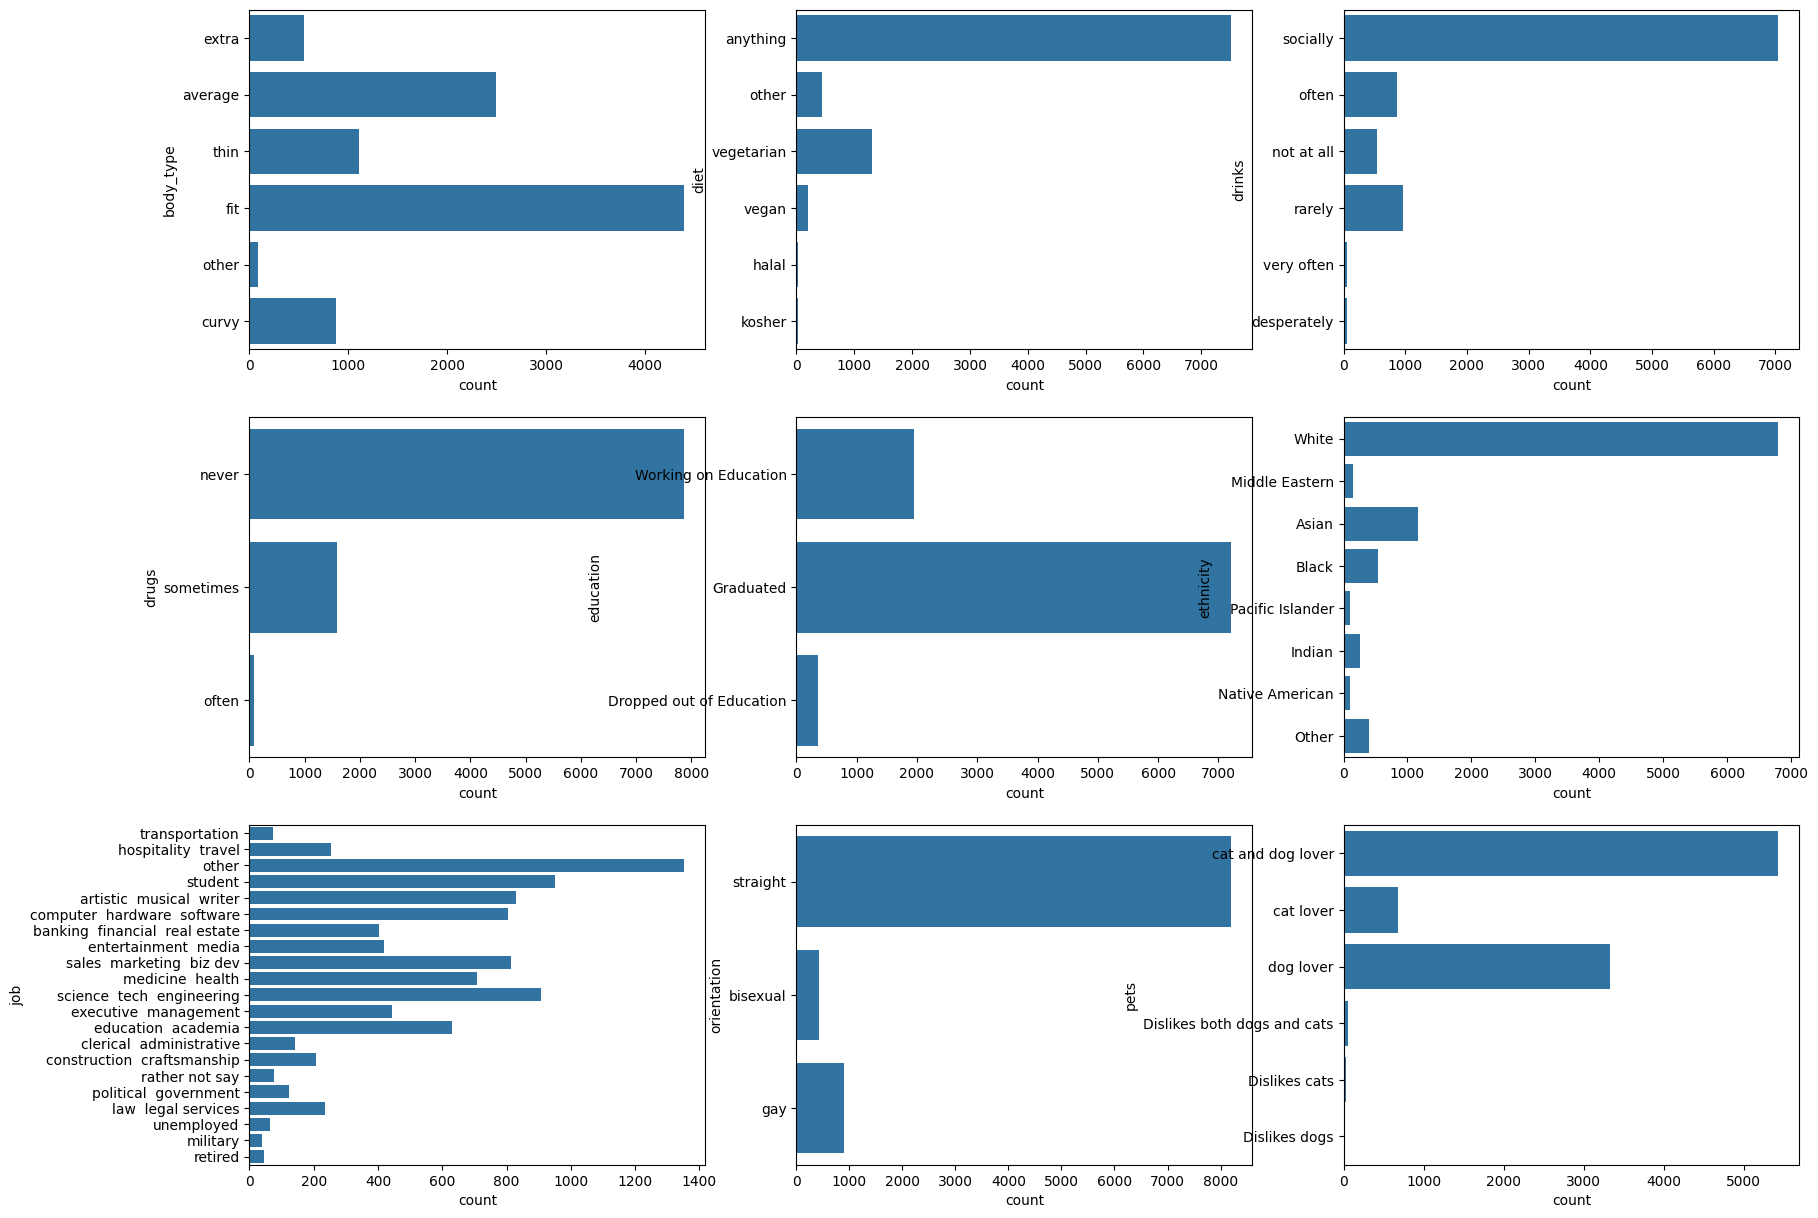

In [58]:
fig, ax2=plt.subplots(3,3,figsize=(20,15)) 
# TR = Subplot çoklu tablo oluşturuyor. a yerine kaç tane satır ve sütün olması gerektiğini yazacağız. 
# EN = Subplot creates multiple tables. Instead of a, we will write how many rows and columns there should be

sns.countplot(df['body_type'],ax=ax2[0][0])
sns.countplot(df['diet'],ax=ax2[0][1])
sns.countplot(df['drinks'],ax=ax2[0][2])
sns.countplot(df['drugs'],ax=ax2[1][0])
sns.countplot(df['education'],ax=ax2[1][1])
sns.countplot(df['ethnicity'],ax=ax2[1][2])
sns.countplot(df['job'],ax=ax2[2][0])
sns.countplot(df['orientation'],ax=ax2[2][1])
sns.countplot(df['pets'],ax=ax2[2][2]);
# TR = ax2 sonrası ([x][y]) yazı [x] ekseninde kaçıncı sırada,[y] ekseninde kaçıncı sırada olacağını belirtiyor.
# EN = The text after ax2 ([x][y]) indicates the rank on the [x] axis and the rank on the [y] axis.

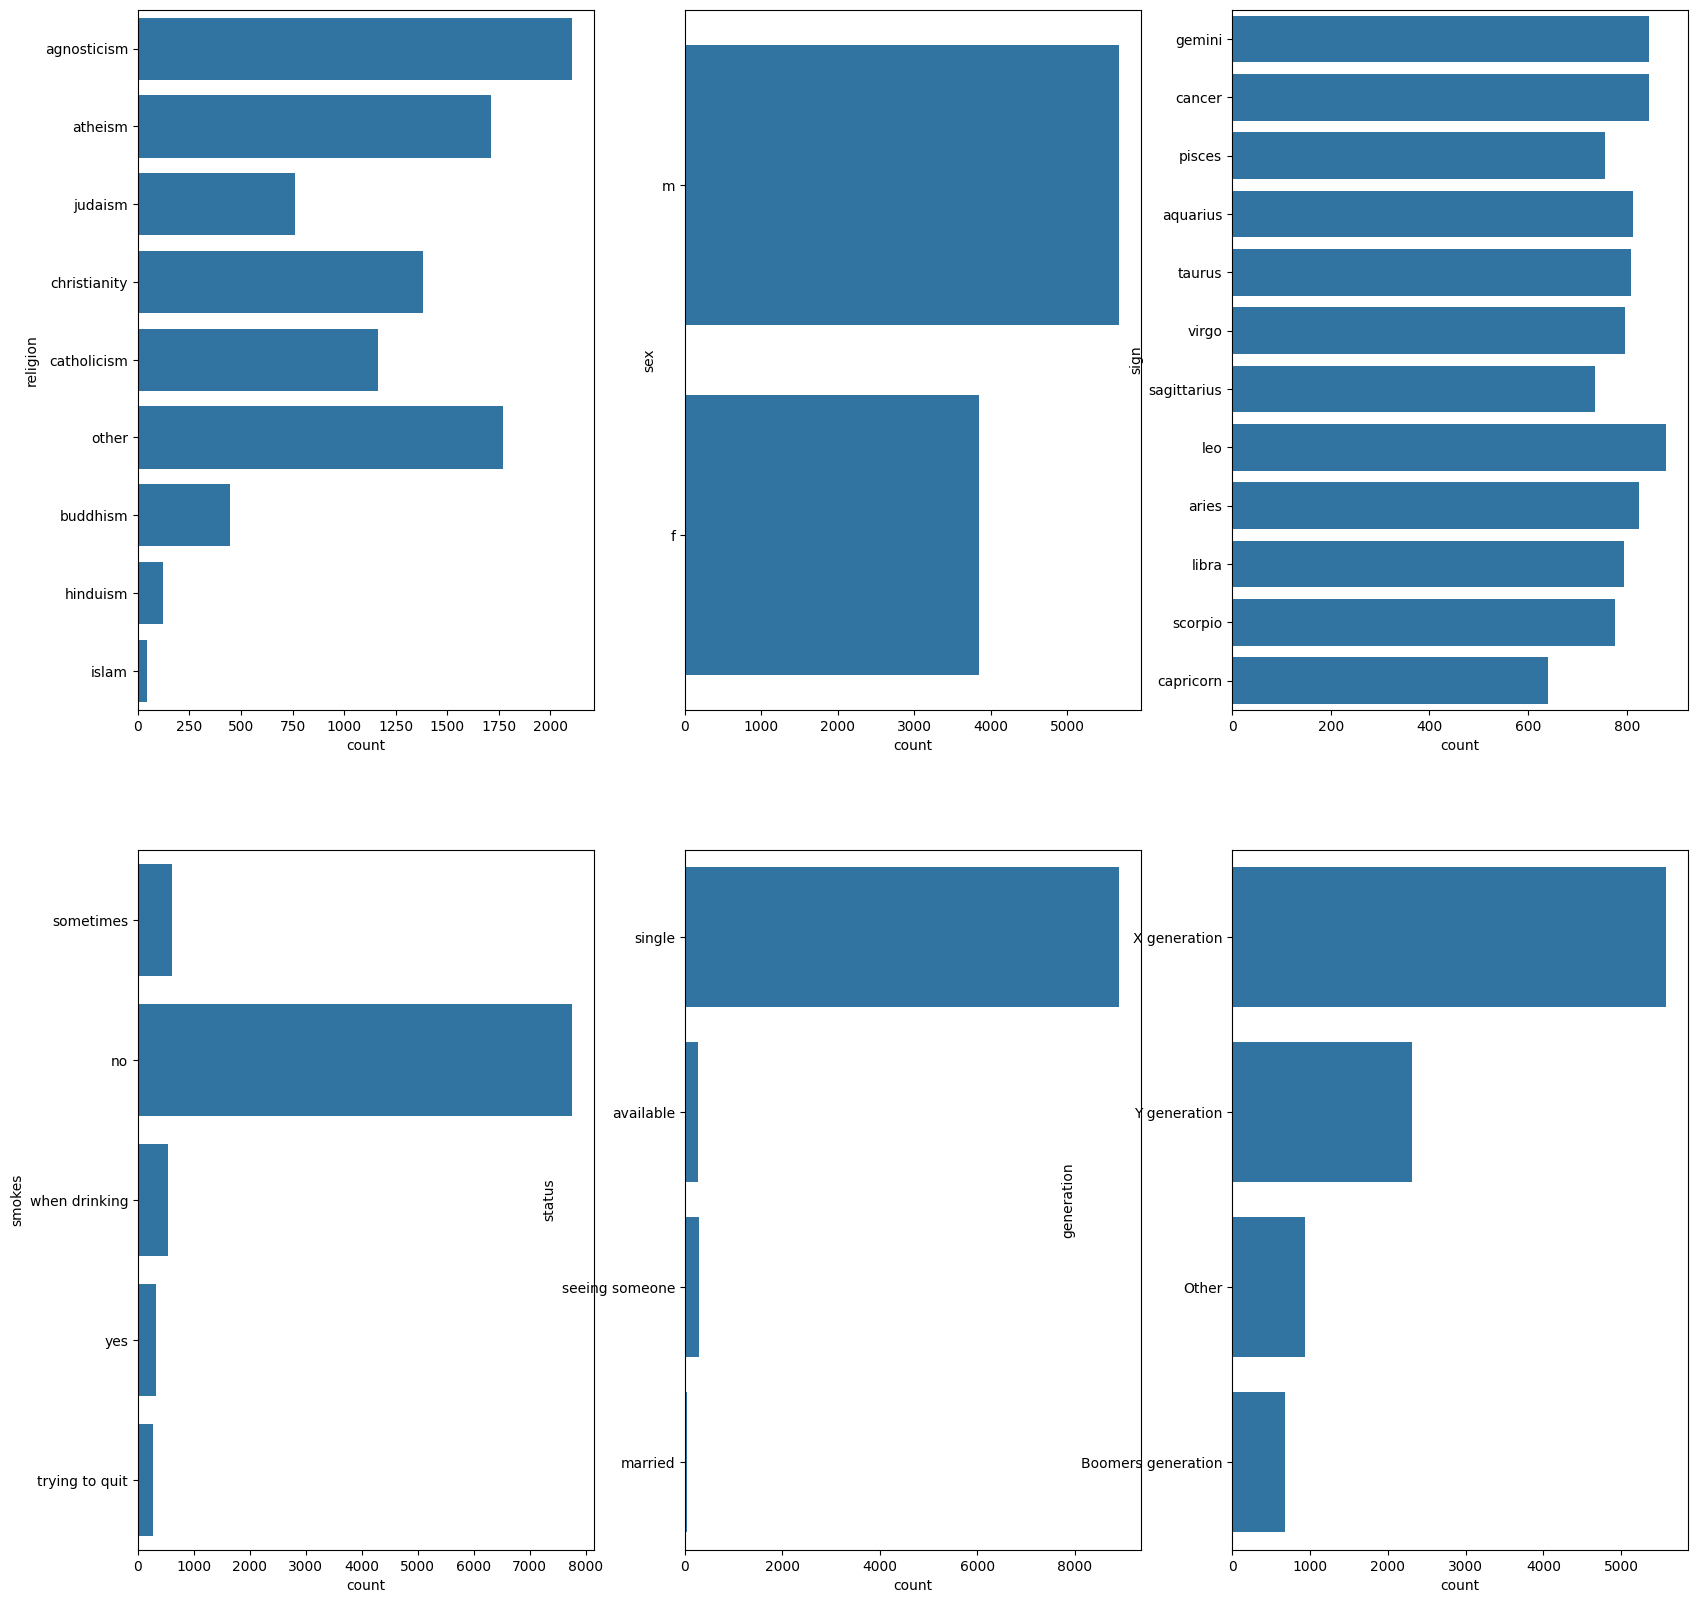

In [59]:
fig, ax2=plt.subplots(2,3,figsize=(20,20))

sns.countplot(df['religion'],ax=ax2[0][0])
sns.countplot(df['sex'],ax=ax2[0][1])
sns.countplot(df['sign'],ax=ax2[0][2])
sns.countplot(df['smokes'],ax=ax2[1][0])
sns.countplot(df['status'],ax=ax2[1][1])
sns.countplot(df['generation'],ax=ax2[1][2]);

## <font color=#e82709> Feature Engineering

## <font color=#fa7efc> Modelling

In [60]:
df.head(1)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,orientation,pets,religion,sex,sign,smokes,speaks,status,year,month,day,hour,minute,kid,generation
0,22.0,extra,anything,socially,never,Working on Education,White,75.0,-1.0,transportation,south san francisco california,straight,cat and dog lover,agnosticism,m,gemini,sometimes,english,single,2012,6,28,20,30,0.0,X generation


In [61]:
df1=df
df1.head(1)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,orientation,pets,religion,sex,sign,smokes,speaks,status,year,month,day,hour,minute,kid,generation
0,22.0,extra,anything,socially,never,Working on Education,White,75.0,-1.0,transportation,south san francisco california,straight,cat and dog lover,agnosticism,m,gemini,sometimes,english,single,2012,6,28,20,30,0.0,X generation


In [62]:
df2=df
df2.head(1)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,orientation,pets,religion,sex,sign,smokes,speaks,status,year,month,day,hour,minute,kid,generation
0,22.0,extra,anything,socially,never,Working on Education,White,75.0,-1.0,transportation,south san francisco california,straight,cat and dog lover,agnosticism,m,gemini,sometimes,english,single,2012,6,28,20,30,0.0,X generation


In [63]:
x=df1[['body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'income','kid','location','job','ethnicity', 'orientation', 
       'pets','religion', 'sex', 'sign', 'smokes', 'status','generation']]
y=df1[['age']]

In [64]:
x=pd.get_dummies(x,drop_first=True)

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

## <font color=red> Regression Derin Öğrenme

In [66]:
scaler = MinMaxScaler()
# TR = Girdilerin belirli bir aralıkta olması performansı artırır. Bu nedenle MinMaxScaler ile verileri 0 ile 1 arasında normalize ediyoruz.
# EN = Having inputs within a certain range improves performance. Therefore, we normalize the data between 0 and 1 with MinMaxScaler.

x_train_scaled = scaler.fit_transform(x_train) 
# TR = Verileri ölçekleyerek, modelin daha hızlı ve etkili öğrenmesini sağlamak için tüm özellikleri aynı aralığa getiriyoruz.
# EN = By scaling the data, we bring all the features into the same range to allow the model to learn faster and more effectively.

x_test_scaled = scaler.transform(x_test)
# TR = Test verilerini eğitimde kullanılan aynı ölçekle dönüştürerek modelin test verileri üzerinde doğru tahminler yapmasını sağlar.
# EN = It enables the model to make accurate predictions on the test data by transforming the test data to the same scale used in training.

model = Sequential()
# TR = Modelin katmanlarını sırayla eklemek için Sequential kullanıyoruz.
# EN = We use Sequential to add layers of the model in order.

model.add(Dense(128, input_dim=x_train.shape[1]))  # Girdi boyutunu belirtiyoruz ve 128 nöronlu bir katman ekliyoruz
# TR = 128 nöronlu bir katman ekliyoruz.
# EN = We add a layer with 128 neurons.

# TR = input_dim=x_train.shape[1] Modelin ilk katmanına giriş verilerinin boyutunu tanımlayarak her özelliğin doğru şekilde işlenmesini sağlar.
# EN = input_dim=x_train.shape[1] Defines the size of the input data in the first layer of the model, ensuring that each feature is processed correctly.

model.add(LeakyReLU(alpha=0.1))  # ReLU'nun geliştirilmiş hali olan LeakyReLU kullanıyoruz, negatif değerleri de öğreniyor
# TR = LeakyReLU'yu, negatif değerlerde de küçük bir eğim sağlayarak ReLU'nun neden olabileceği "ölü nöron" problemini önlemek ve öğrenmeyi iyileştirmek için kullandık.
# EN = We used LeakyReLU to improve learning and avoid the "dead neuron" problem that ReLU can cause by providing a small gradient even at negative values.

# TR = A value of alpha = 0.1 provides a small but constant slope on negative inputs, allowing the model to learn from these values ​​as well.
# EN = alpha=0.1 değeri, negatif girişlerde küçük ama sabit bir eğim sağlayarak modelin bu değerlerden de bilgi öğrenmesine olanak tanır.

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))

model.add(Dropout(0.2))
# TR = Aşırı öğrenmeyi önlemek için Dropout ile rastgele nöronları devre dışı bırakıyoruz, aşırı öğrenmeyi engelliyor.
# EN = To prevent over-learning, we disable random neurons with Dropout, it prevents over-learning.

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(16))
model.add(LeakyReLU(alpha=0.1))

model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))
# TR = Regresyon görevleri için lineer aktivasyon kullanıyoruz.
# EN = We use linear activation for regression tasks.

model.compile(loss='mse', optimizer='adam')  # Modeli ortalama kare hata (mse) kaybı ile derliyoruz
# TR = Modeli ortalama kare hata (mse) kaybı ile derliyoruz.
# EN = We compile the model with mean square error (mse) loss.

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  
# TR = EarlyStopping ekleyin: Eğitim sırasında model performansı iyileşmediğinde erken durması için kullanıyoruz.
# EN = Add EarlyStopping: We use it to stop early when model performance does not improve during training.

# TR = val_loss 10 epoch boyunca iyileşmezse eğitimi durduruyor ve en iyi ağırlıkları geri yüklüyor.
# EN = If val_loss does not improve for 10 epochs, it stops training and restores the best weights.


In [67]:
graphic1=model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), batch_size=128, epochs=100, callbacks=[early_stopping])
# TR = Modeli 100 epoch boyunca eğitiyoruz, fakat EarlyStopping ile durdurulabilir. Batch boyutu 128 olarak belirlenmiş.
# EN = We train the model for 100 epochs, but it can be stopped with EarlyStopping. Batch size is set to 128.

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 882.5245 - val_loss: 115.2896
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 133.8098 - val_loss: 68.7201
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.2202 - val_loss: 54.6889
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83.5424 - val_loss: 46.3830
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.1297 - val_loss: 37.8673
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.1007 - val_loss: 32.1278
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.2096 - val_loss: 22.4092
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.0910 - val_loss: 19.2629
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.5942 - val_loss: 19.2703
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.1177 - val_loss: 17.9152
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.1824 - val_loss: 21.9996
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━

In [68]:
pred = model.predict(x_test_scaled)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [69]:
print(r2_score(y_test, pred))

0.8175460613776748


In [70]:
mean_squared_error(y_test,pred)**.5

4.072139290868949

In [71]:
mean_absolute_error(y_test,pred)

3.0789232835353704

In [72]:
residuals=y_test-pred

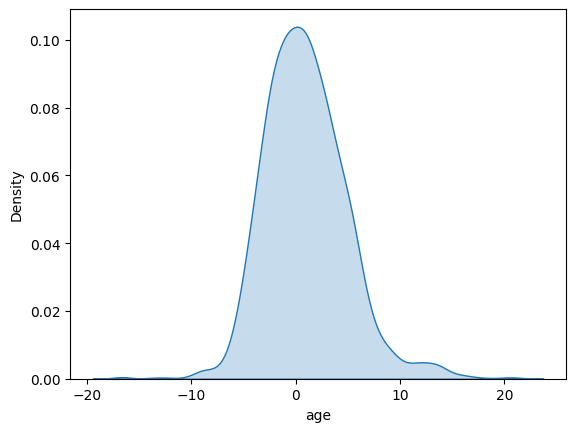

In [73]:
sns.kdeplot(x=residuals['age'],fill=True);

In [74]:
loss_f=pd.DataFrame(graphic1.history)

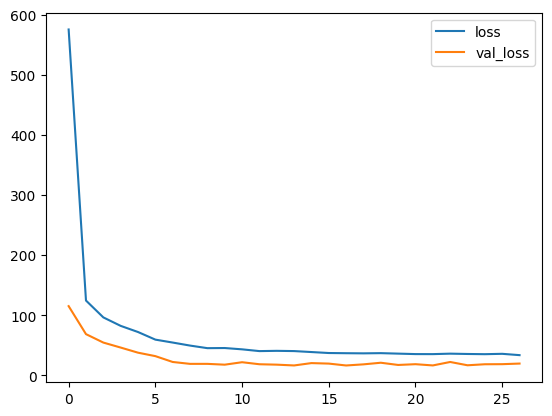

In [75]:
loss_f.plot();

## <font color=red> Classification Derin Öğrenme

In [76]:
x=df2[['body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'income', 'kid','job','ethnicity', 'location', 'orientation', 
       'pets','religion', 'sex', 'sign', 'smokes', 'speaks', 'status','age']]
y=df2[['generation']]

In [77]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9513
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   body_type    9514 non-null   object 
 1   diet         9514 non-null   object 
 2   drinks       9514 non-null   object 
 3   drugs        9514 non-null   object 
 4   education    9514 non-null   object 
 5   height       9514 non-null   float64
 6   income       9514 non-null   float64
 7   kid          9514 non-null   float64
 8   job          9514 non-null   object 
 9   ethnicity    9514 non-null   object 
 10  location     9514 non-null   object 
 11  orientation  9514 non-null   object 
 12  pets         9514 non-null   object 
 13  religion     9514 non-null   object 
 14  sex          9514 non-null   object 
 15  sign         9514 non-null   object 
 16  smokes       9514 non-null   object 
 17  speaks       9514 non-null   object 
 18  status       9514 non-null   object 
 19  age        

In [78]:
x=pd.get_dummies(x,drop_first=True)

In [79]:
x

,height,income,kid,age,body_type_curvy,body_type_extra,body_type_fit,body_type_other,body_type_thin,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_not at all,drinks_often,drinks_rarely,...,speaks_english thai okay french poorly,speaks_english thai okay spanish poorly,speaks_english thai poorly,speaks_english tibetan japanese afrikaans cebuano,speaks_english turkish,speaks_english turkish c,speaks_english turkish fluently italian okay,speaks_english urdu french arabic russian poorly,speaks_english vietnamese,speaks_english vietnamese okay,speaks_english vietnamese okay spanish okay,speaks_english vietnamese poorly,speaks_english vietnamese spanish,speaks_english yiddish poorly,status_married,status_seeing someone,status_single
0,75.0,-1.0,0.0,22.0,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,70.0,80000.0,0.0,35.0,False,False,False,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,68.0,-1.0,0.0,38.0,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,71.0,20000.0,0.0,23.0,False,False,False,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,66.0,-1.0,0.0,29.0,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,73.0,60000.0,0.0,28.0,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9510,72.0,-1.0,0.0,31.0,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9511,71.0,-1.0,0.0,34.0,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9512,70.0,-1.0,0.0,29.0,False,False,True,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [80]:
print(x.dtypes)
print(y.dtypes)

height                               float64
income                               float64
kid                                  float64
age                                  float64
body_type_curvy                         bool
                                      ...   
speaks_english vietnamese spanish       bool
speaks_english yiddish poorly           bool
status_married                          bool
status_seeing someone                   bool
status_single                           bool
Length: 1965, dtype: object
generation    object
dtype: object


In [81]:
y=pd.get_dummies(y,drop_first=True)

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [83]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax')) 
# TR = Softmax, çok sınıflı sınıflandırma için uygun.
# EN = Softmax is suitable for multi-class classification.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
graphic2 = model.fit(x, y, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4753 - loss: 1.2668 - val_accuracy: 0.7714 - val_loss: 0.5550
Epoch 2/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6968 - loss: 0.6590 - val_accuracy: 0.7704 - val_loss: 0.4288
Epoch 3/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7190 - loss: 0.5921 - val_accuracy: 0.6963 - val_loss: 0.5724
Epoch 4/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7318 - loss: 0.5494 - val_accuracy: 0.6479 - val_loss: 0.7649
Epoch 5/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7223 - loss: 0.5747 - val_accuracy: 0.6159 - val_loss: 0.8576
Epoch 6/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7084 - loss: 0.5914 - val_accuracy: 0.5854 - val_loss: 0.8011
Epoch 7/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7110 - loss: 0.5936 - val_accuracy: 0.6148 - val_loss: 0.6597
Epoch 8/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6937 - loss: 0.6288 - val_accu

In [85]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 512)                 │       1,006,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,551,691 (13.55 MB)

 Trainable params: 1,183,235 (4.51 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 2,366,472 (9.03 MB)

In [86]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test doğruluğu: {test_acc:.4f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7779 - loss: 0.4293
Test doğruluğu: 0.7693


In [87]:
pred=model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik. 
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [88]:
pred

array([[0.20554441, 0.55460817, 0.23984739],
       [0.03713926, 0.95126075, 0.01160004],
       [0.1401812 , 0.577158  , 0.28266078],
       ...,
       [0.29753053, 0.01142144, 0.691048  ],
       [0.0850377 , 0.8794201 , 0.03554216],
       [0.2099086 , 0.276236  , 0.5138554 ]], dtype=float32)

In [89]:
pred = np.argmax(pred, axis=1)

In [90]:
pred

array([1, 1, 1, ..., 2, 1, 2], dtype=int64)

In [91]:
y_test

,generation_Other,generation_X generation,generation_Y generation
4220,False,True,False
4694,False,True,False
6678,False,False,True
4730,False,False,True
9289,False,False,True
...,...,...,...
4927,False,True,False
9006,False,True,False
3651,False,False,False
7429,False,True,False


In [92]:
y_test = np.argmax(y_test, axis=1)

In [93]:
y_test

array([1, 1, 2, ..., 0, 1, 0], dtype=int64)

In [94]:
accuracy_score(y_test, pred)
# TR = accuracy_score fonksiyonu ile y_test, pred kullanarak sonucumuzu bulduk.
# EN = We found our result using the accuracy_score function and y_test, pred.

0.7693116132422491

In [95]:
confusion_matrix(y_test, pred)
# TR = confusion_matrix fonksiyonu ile y_test, pred kullanarak ne kadarını yanlış tahmin ettiğimizi buluyoruz
# EN = Using the confusion_matrix function and y_test, pred, we find out how much we guessed wrong.

# TR = 4 sayı değeri veriyor bize. Sol üst ve sağ alt doğru tahmin, sağ üst ve sol alt yanlış tahmin. 
# EN = It gives us 4 number values. Upper left and lower right are correct guesses, upper right and lower left are incorrect guesses.

array([[   0,   91,  230],
       [   0, 1112,   13],
       [   0,  105,  352]], dtype=int64)

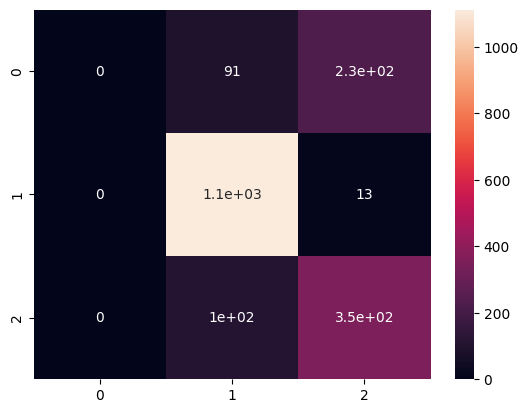

In [96]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True);
# TR = Yukarıdakinin görsel versiyonu.
# EN = Visual version of the above.

In [97]:
print(classification_report(y_test, pred))
# TR = print içinde yazdık yoksa sayıların sıralanması bozuluyor.
# EN = We wrote it in print, otherwise the order of the numbers will be disrupted.

# TR = classification_report ile y_test, pred kullanarak precision, recall, f1-score ve support ulaştık.
# EN = We achieved precision, recall, f1-score and support using classification_report and y_test, pred.

# TR = Precision (Kesinlik): Doğru olarak pozitif tahmin edilen örneklerin, toplam pozitif tahmin edilen örnekler içindeki oranını gösterir. Yani, modelin pozitif sınıfı ne kadar doğru tahmin ettiğini ölçer.
# EN = Precision (Precision): It shows the ratio of correctly predicted positive samples among the total positive predicted samples. That is, it measures how accurately the model predicts the positive class.

# TR = Recall (Duyarlılık): Gerçek pozitif örneklerin, toplam pozitif örnekler içindeki oranını gösterir. Modelin pozitif sınıfı ne kadar iyi bulduğunu ölçer.
# EN = Recall (Sensitivity): Shows the ratio of true positive samples in total positive samples. It measures how well the model finds the positive class.

# TR = F1-score: Precision ve recall'un harmonik ortalamasıdır. Hem precision hem de recall'u dikkate alarak modelin genel performansını özetler.
# EN = F1-score: It is the harmonic mean of precision and recall. It summarizes the overall performance of the model, taking into account both precision and recall.

# TR = Support: Her sınıftan kaç örneğin bulunduğunu gösterir. Yani, gerçek etiketlerde her bir sınıfa ait kaç örnek olduğunu ifade eder.
# EN = Support: Shows how many examples of each class are available. That is, it expresses how many examples of each class there are in the real labels.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       321
           1       0.85      0.99      0.91      1125
           2       0.59      0.77      0.67       457

    accuracy                           0.77      1903
   macro avg       0.48      0.59      0.53      1903
weighted avg       0.64      0.77      0.70      1903



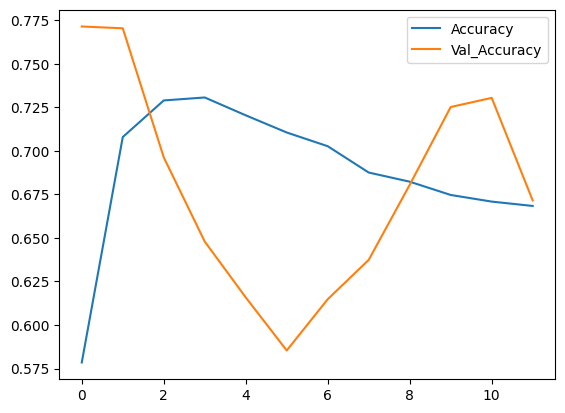

In [98]:
plt.plot(graphic2.history['accuracy'],label='Accuracy')
plt.plot(graphic2.history['val_accuracy'],label='Val_Accuracy')
plt.legend();